In [8]:
from kafka import KafkaConsumer

ImportError: cannot import name 'KafkaConsumer' from 'kafka' (unknown location)

In [26]:
filepath = './data/request_3.csv'
server, topic = "fall2022-comp585.cs.mcgill.ca:9092", "movielog4"
consumer = KafkaConsumer(
    topic, bootstrap_servers=[server], api_version=(0, 11, 5)
)
curr=0
amount=10100
with open (filepath,'w+') as data_file:
        csv_writer = csv.writer(data_file)
        
        for log in consumer:
            message = log.value.decode("utf-8")
            parsed = message.split(",")
            if (
                parsed[2].find(
                    "recommendation request"
                )
                != -1
            ):
                if parsed[3].find("status 200") == 1:
                    parsed[4] = parsed[4].split()[1]
                    user = [parsed[1]]
                    movies = [s.strip() for s in parsed[4:-1]]
                    csv_writer.writerow(user+movies)
                    curr += 1

            if curr % (amount/100) == 0:
                print(str(math.floor((curr/amount)*100)) + "%", end='\r')

            if curr >= amount:
                break

In [1]:
import requests
import json

user_info_url = "http://fall2022-comp585.cs.mcgill.ca:8080/user/"
movie_info_url = "http://fall2022-comp585.cs.mcgill.ca:8080/movie/"

# get request to provided {url} for {id}
def get_info_from_rest(url, id):
    type = url.rsplit('/', 2)[1]
    url = url+str(id)
    filepath = "../data/"+type+'_info.json'
    response = requests.get(url)
    json_item = response.json()

    return json_item

# gets info of {id} user
def get_user_info(id):
    return get_info_from_rest(user_info_url, id)

# gets info of {id} movie
def get_movie_info(id):
    movie = get_info_from_rest(movie_info_url, id)
    if movie == {'message': 'movie not found'}:
        return None
    return movie

In [2]:
get_user_info("1")

{'user_id': 1, 'age': 34, 'occupation': 'sales/marketing', 'gender': 'M'}

# Fairness of users analysis

In [4]:
import pandas as pd

In [7]:
user_info=[]
gender_lst=[]
for id in range(1,1000001):
    info = get_user_info(str(id))
    gender_lst.append(info['gender'])
    user_info.append(info)
df = pd.DataFrame.from_dict(user_info)
df.to_csv (r'./data/user_info.csv', index = False, header=True)

In [15]:
id=[]
for i in range(1,5):
    df = pd.read_csv("./data/association"+str(i)+".csv")
    id += list(df.userid)

userid=[]
for i in id:
    if i.isnumeric():
        userid.append(int(i))
userid=sorted(userid)
unique_userid=list(set(userid))

In [40]:
user_info = pd.read_csv("./data/user_info.csv")
original_gender_lst = sorted(list(user_info['gender']))
original_age_lst = sorted(list(user_info['age']))
original_occupation_lst = sorted(list(user_info['occupation']))
occupation_index = sorted(list(set(original_occupation_lst)))
occupation_index = {occupation_index[i]: i for i in range(len(occupation_index))}
original_occupation_lst = [occupation_index[i] for i in original_occupation_lst]

telemetry_gender_lst = sorted(list(user_info.loc[user_info.user_id.isin(unique_userid)]['gender']))
telemetry_age_lst = sorted(list(user_info.loc[user_info.user_id.isin(unique_userid)]['age']))
telemetry_occupation_lst = sorted(list(user_info.loc[user_info.user_id.isin(unique_userid)]['occupation']))
telemetry_occupation_lst = [occupation_index[i] for i in telemetry_occupation_lst]

In [36]:
print(occupation_index)

{'K-12 student': 0, 'academic/educator': 1, 'artist': 2, 'clerical/admin': 3, 'college/grad student': 4, 'customer service': 5, 'doctor/health care': 6, 'executive/managerial': 7, 'farmer': 8, 'homemaker': 9, 'lawyer': 10, 'other or not specified': 11, 'programmer': 12, 'retired': 13, 'sales/marketing': 14, 'scientist': 15, 'self-employed': 16, 'technician/engineer': 17, 'tradesman/craftsman': 18, 'unemployed': 19, 'writer': 20}


Text(0, 0.5, 'Number')

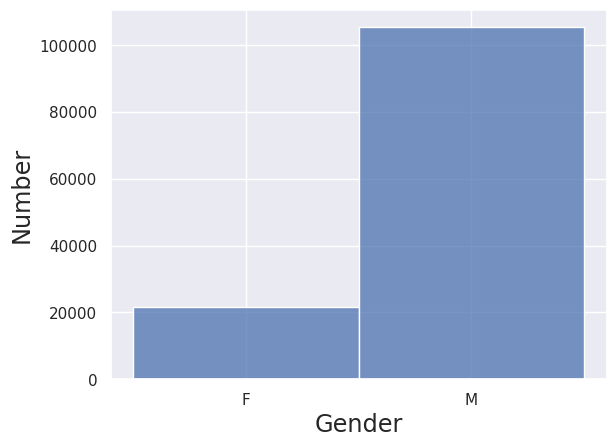

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.histplot(x=telemetry_gender_lst, binwidth=0.05)
plt.xlabel("Gender", fontsize="x-large")
plt.ylabel("Number", fontsize="x-large")



Text(2.8194444444444517, 0.5, 'Density')

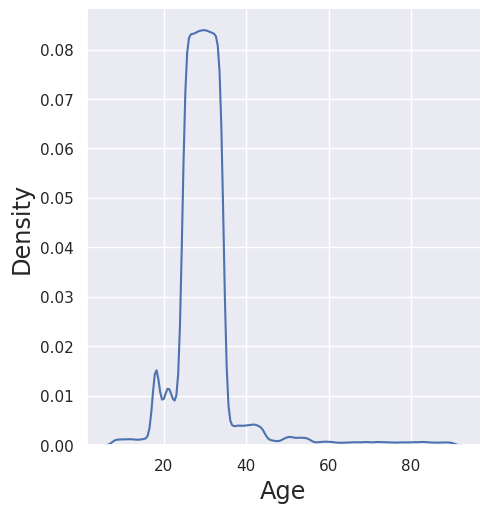

In [56]:
sns.displot(x=telemetry_age_lst, kind="kde")
plt.xlabel("Age", fontsize="x-large")
plt.ylabel("Density", fontsize="x-large")

Text(-6.680555555555548, 0.5, 'Density')

<Figure size 800x700 with 0 Axes>

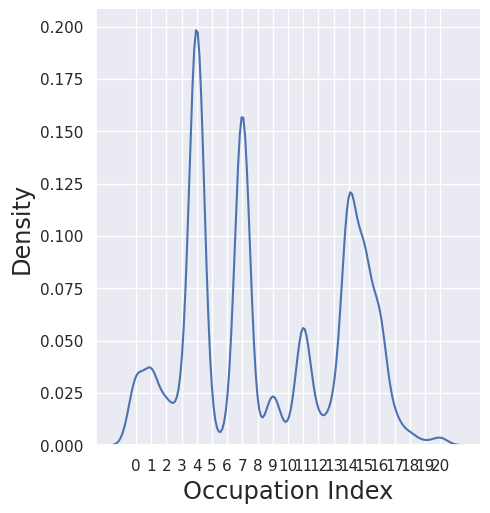

In [57]:
plt.figure(figsize=(8,7))
sns.displot(x=telemetry_occupation_lst, kind="kde")
plt.xlabel("Occupation Index", fontsize="x-large")
plt.xticks(range(0,21,1))
plt.ylabel("Density", fontsize="x-large")